In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline

### Take a look at get_shatten_statistics results

Current size is 50. Each simulation had 100 trials. Simulations parameters:

`
num_cut_finder_trials = 10; # to find the cut
is_quiet = true;
is_cvx_quiet = true;
p = 0.05; # in Schatten norms
eps = 0.1; # in Schatten norms
num_iter = 10; # IRLS iterations
precision = 0.001; # IRLS tolerance
methods = {'schatten'};
rank_tolerance = 1e-3;`

In [1]:
def read_and_prepare_data(filename, prob, dataframe=None):
    results = pd.read_csv(filename)
    results['cut optval delta'] = results['schatten_cut_optval'] - results['sdp_cut_optval']
    results['optval delta'] = results['schatten_optval'] - results['sdp_optval']
    results['rank delta'] = results['schatten_rank'] - results['sdp_rank']
    results['prob'] = prob
    
    if dataframe is not None:
        return pd.concat((dataframe, results)).reset_index().drop(['index'], axis=1)
    
    return results

# Schatten

In [9]:
results = read_and_prepare_data('./results/res_p01s50.csv', 0.1)
results = read_and_prepare_data('./results/res_p02s50.csv', 0.2, results)
results = read_and_prepare_data('./results/res_p05s50.csv', 0.5, results)
results = read_and_prepare_data('./results/res_p08s50.csv', 0.8, results)

### Cut differences

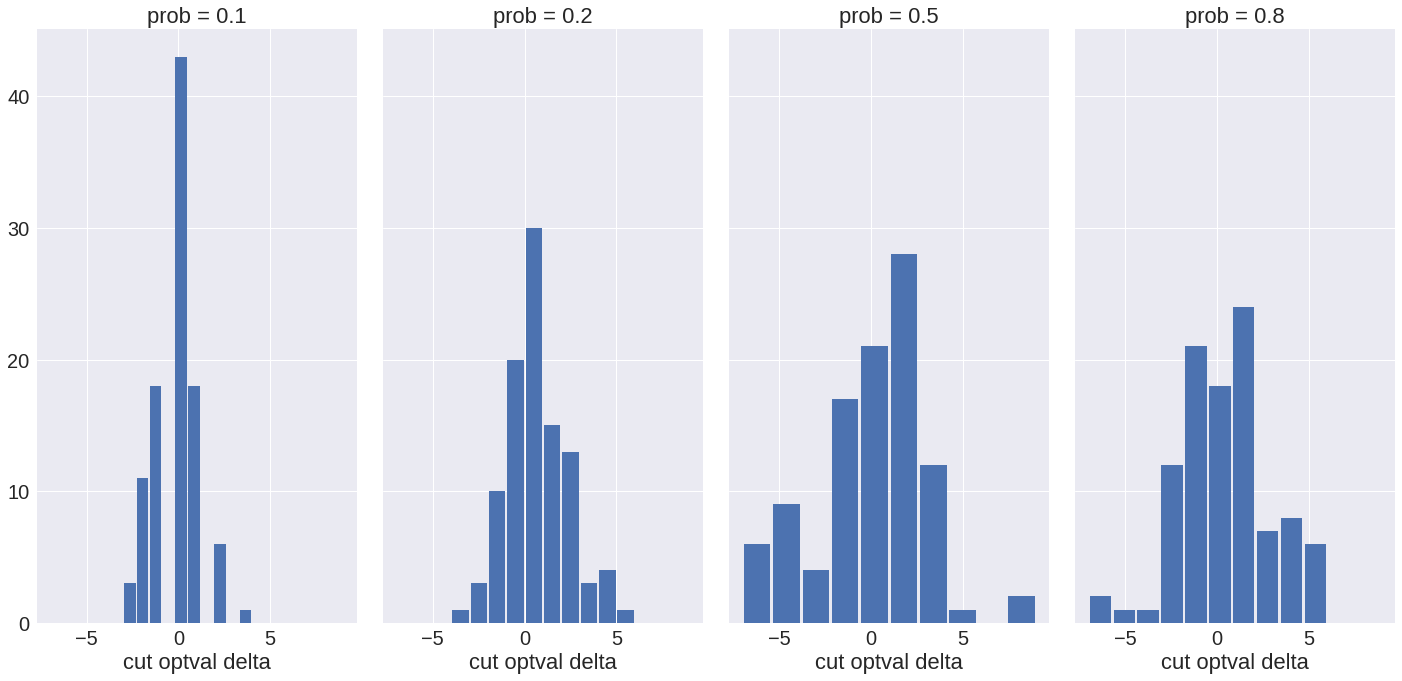

In [21]:
sns.set(font_scale=2) 
g = sns.FacetGrid(results, col='prob', size=10, aspect=0.5)
sns_plot = g.map(plt.hist, "cut optval delta", bins=10, rwidth=0.9)
sns.plt.show()
sns_plot.savefig("cut_diff_irls.png")

Mean and std of the gain

In [25]:
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].mean())
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].std())

prob
0.1    1.360000
0.2    2.000000
0.5    2.302326
0.8    2.600000
Name: cut_optval_delta, dtype: float64
prob
0.1    0.700000
0.2    1.195229
0.5    1.806534
0.8    1.557971
Name: cut_optval_delta, dtype: float64


In most of the cases Schatten norms approach does not make the cut value worse.

In [64]:
print('Fraction of Schatten solutions that are not worse than SDP')
print(results[results['cut_optval_delta'] >= 0].groupby(['prob']).size() / results.groupby(['prob']).size())
print('\nFraction of Schatten solutions that are better than SDP')
print(results[results['cut_optval_delta'] > 0].groupby(['prob']).size() / results.groupby(['prob']).size())

Fraction of Schatten solutions that are not worse than SDP
prob
0.1    0.68
0.2    0.66
0.5    0.64
0.8    0.63
dtype: float64

Fraction of Schatten solutions that are better than SDP
prob
0.1    0.25
0.2    0.36
0.5    0.43
0.8    0.45
dtype: float64


### Optval differences

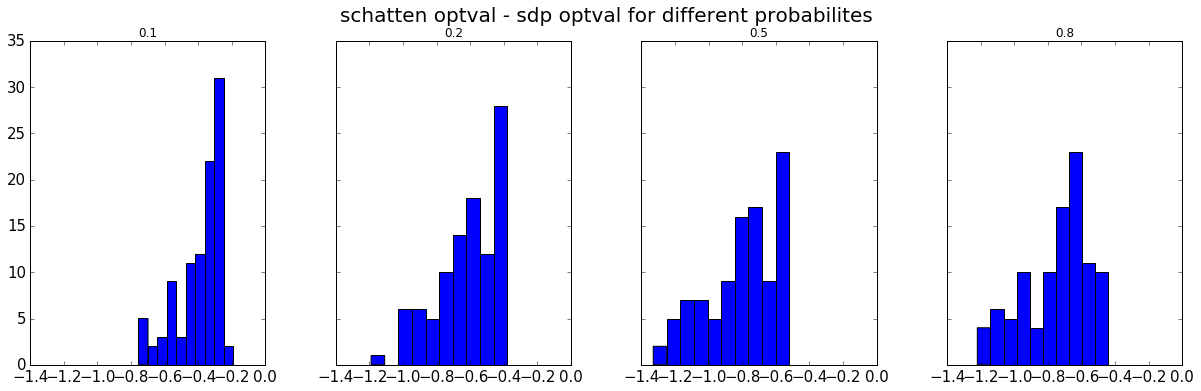

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='optval_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01)

plt.suptitle("schatten optval - sdp optval for different probabilites", fontsize=20)
plt.show()

As one can see, Schatten norm solution is always smaller than the SDP one

### Rank difference

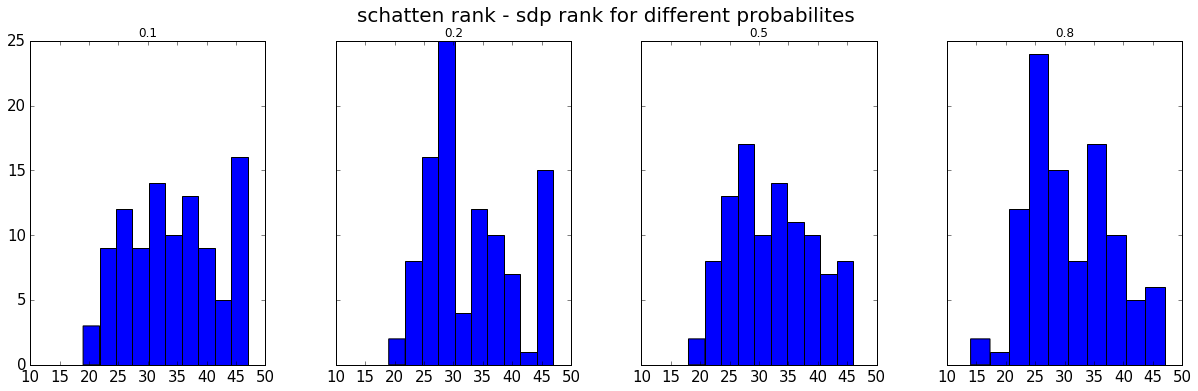

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='rank_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01)

plt.suptitle("schatten rank - sdp rank for different probabilites", fontsize=20)
plt.show()

However, for rank tolerance `1e-3` (i.e. all singular values are considered zero if they are smaller than tolerance) rank difference is quite impressing.

# Greedy search analysis

In [26]:
def read_and_prepare_data(filename, prob, dataframe=None):
    results = pd.read_csv(filename)
    results['cut_optval_delta'] = results['greedy_cut_optval'] - results['sdp_cut_optval']
    results['prob'] = prob
    
    if dataframe is not None:
        return pd.concat((dataframe, results)).reset_index().drop(['index'], axis=1)
    
    return results

In [27]:
results = read_and_prepare_data('./results/greedy_01_50.csv', 0.1)
results = read_and_prepare_data('./results/greedy_02_50.csv', 0.2, results)
results = read_and_prepare_data('./results/greedy_05_50.csv', 0.5, results)
results = read_and_prepare_data('./results/greedy_08_50.csv', 0.8, results)

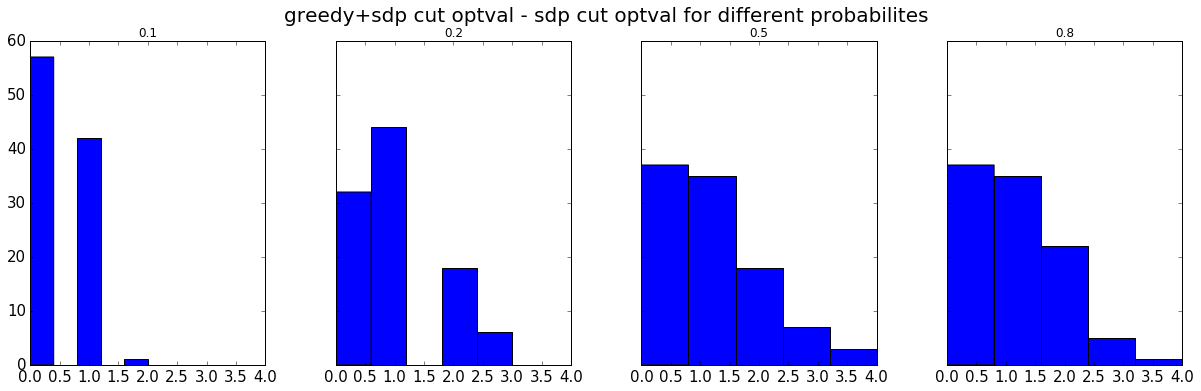

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='cut_optval_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01, bins=5)

plt.suptitle("greedy+sdp cut optval - sdp cut optval for different probabilites", fontsize=20)
plt.show()

Mean and std of the gain

In [29]:
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].mean())
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].std())

prob
0.1    1.023256
0.2    1.441176
0.5    1.650794
0.8    1.555556
Name: cut_optval_delta, dtype: float64
prob
0.1    0.152499
0.2    0.655228
0.5    0.864324
0.8    0.713415
Name: cut_optval_delta, dtype: float64


In [8]:
print('Fraction of Schatten solutions that are not worse than SDP')
print(results[results['cut_optval_delta'] >= 0].groupby(['prob']).size() / results.groupby(['prob']).size())
print('\nFraction of Schatten solutions that are better than SDP')
print(results[results['cut_optval_delta'] > 0].groupby(['prob']).size() / results.groupby(['prob']).size())

Fraction of Schatten solutions that are not worse than SDP
prob
0.1    1
0.2    1
0.5    1
0.8    1
dtype: float64

Fraction of Schatten solutions that are better than SDP
prob
0.1    0.43
0.2    0.68
0.5    0.63
0.8    0.63
dtype: float64


# Rank one start

In [7]:
def read_and_prepare_data(filename, prob, dataframe=None):
    results = pd.read_csv(filename)
    results['cut_optval_delta'] = results['schatten_cut_optval'] - results['sdp_cut_optval']
    results['optval_delta'] = results['schatten_optval'] - results['sdp_optval']
    results['rank_delta'] = results['schatten_rank'] - results['sdp_rank']
    results['prob'] = prob
    
    if dataframe is not None:
        return pd.concat((dataframe, results)).reset_index().drop(['index'], axis=1)
    
    return results

In [8]:
results = read_and_prepare_data('./results/rankone_05_50.csv', 0.5)
# results = read_and_prepare_data('./results/res_p02s50.csv', 0.2, results)

### Cut diff

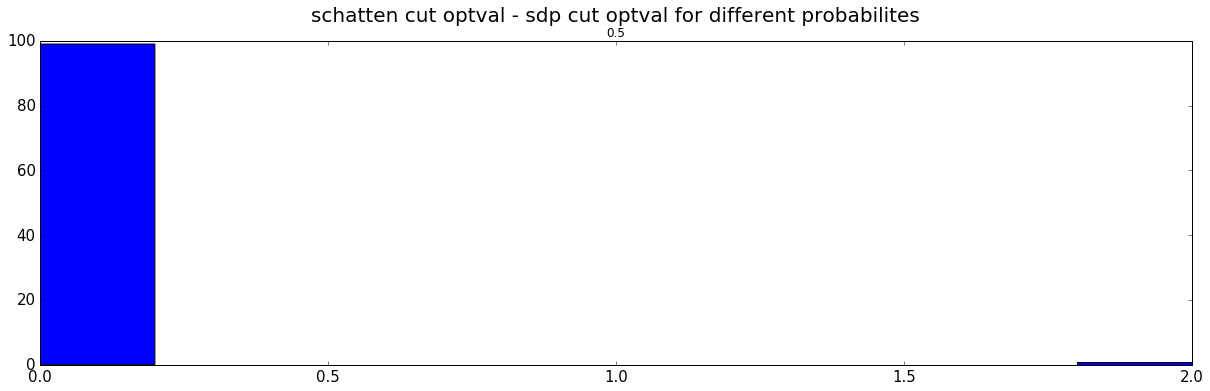

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='cut_optval_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01)

plt.suptitle("schatten cut optval - sdp cut optval for different probabilites", fontsize=20)
plt.show()

In [10]:
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].mean())
print(results[results['cut_optval_delta'] > 0].groupby('prob')['cut_optval_delta'].std())

prob
0.5    2
Name: cut_optval_delta, dtype: int64
prob
0.5   NaN
Name: cut_optval_delta, dtype: float64


In [11]:
print('Fraction of Schatten solutions that are not worse than SDP')
print(results[results['cut_optval_delta'] >= 0].groupby(['prob']).size() / results.groupby(['prob']).size())
print('\nFraction of Schatten solutions that are better than SDP')
print(results[results['cut_optval_delta'] > 0].groupby(['prob']).size() / results.groupby(['prob']).size())

Fraction of Schatten solutions that are not worse than SDP
prob
0.5    1
dtype: float64

Fraction of Schatten solutions that are better than SDP
prob
0.5    0.01
dtype: float64


### Optval diff

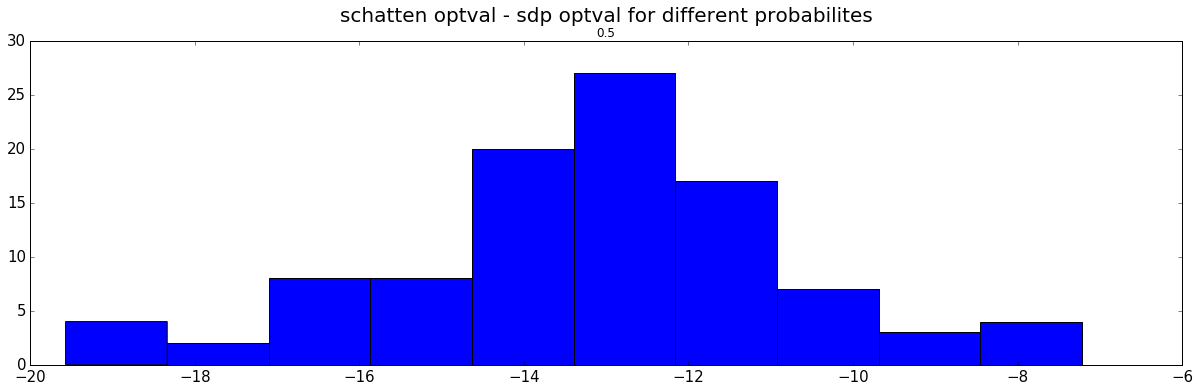

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='optval_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01)

plt.suptitle("schatten optval - sdp optval for different probabilites", fontsize=20)
plt.show()

### Rank diff

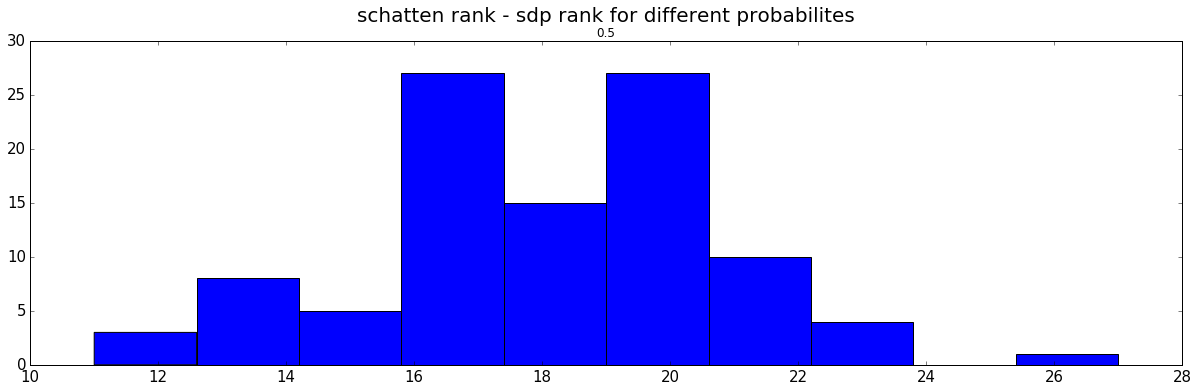

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(results['prob'])), 
                         sharex=True, sharey=True, figsize=(20, 6))
results.hist(by='prob', column='rank_delta', ax=axes, xlabelsize=15, ylabelsize=15, xrot=0.01)

plt.suptitle("schatten rank - sdp rank for different probabilites", fontsize=20)
plt.show()

# Langevin dynamics (10 итераций)

In [1]:
def read_and_prepare_data(filename, prob, dataframe=None):
    results = pd.read_csv(filename)
    results['cut optval delta'] = results['langevin_cut_optval'] - results['sdp_cut_optval']
    results['prob'] = prob
    
    if dataframe is not None:
        return pd.concat((dataframe, results)).reset_index().drop(['index'], axis=1)
    
    return results

### $\xi=1$

In [5]:
results = read_and_prepare_data('./results/langevin_01_50', 0.1)
results = read_and_prepare_data('./results/langevin_02_50', 0.2, results)
results = read_and_prepare_data('./results/langevin_05_50', 0.5, results)
results = read_and_prepare_data('./results/langevin_08_50', 0.8, results)

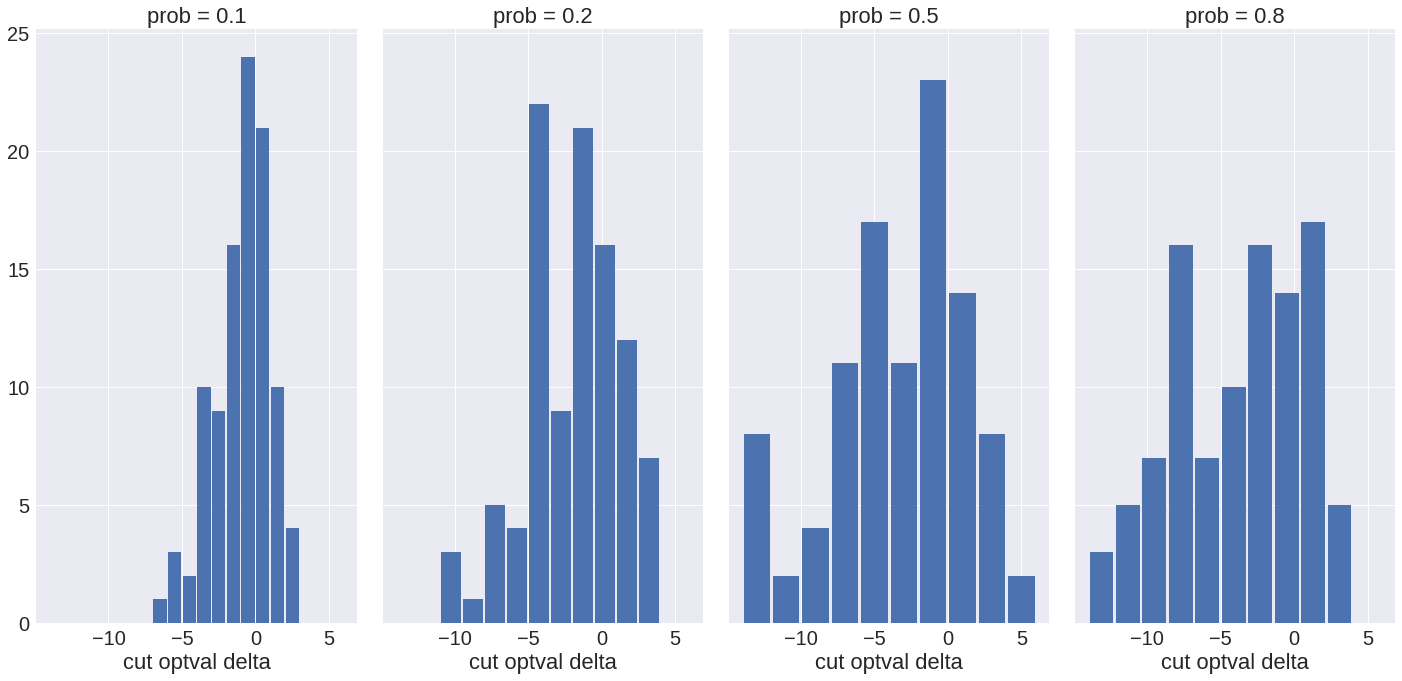

In [6]:
sns.set(font_scale=2) 
g = sns.FacetGrid(results, col='prob', size=10, aspect=0.5)
sns_plot = g.map(plt.hist, "cut optval delta", bins=10, rwidth=0.9)
sns.plt.show()
sns_plot.savefig("cut_diff_langevin.png")

### $\xi=10e\textrm{-5}$

In [9]:
results = read_and_prepare_data('./results/lang_0_2_50_p^_7_eps^_7_norm_poiss', 0.1)
results = read_and_prepare_data('./results/lang_0_5_50_p^_7_eps^_7_norm_poiss', 0.2, results)
results = read_and_prepare_data('./results/lang_0_8_50_p^_7_eps^_7_norm_poiss', 0.5, results)

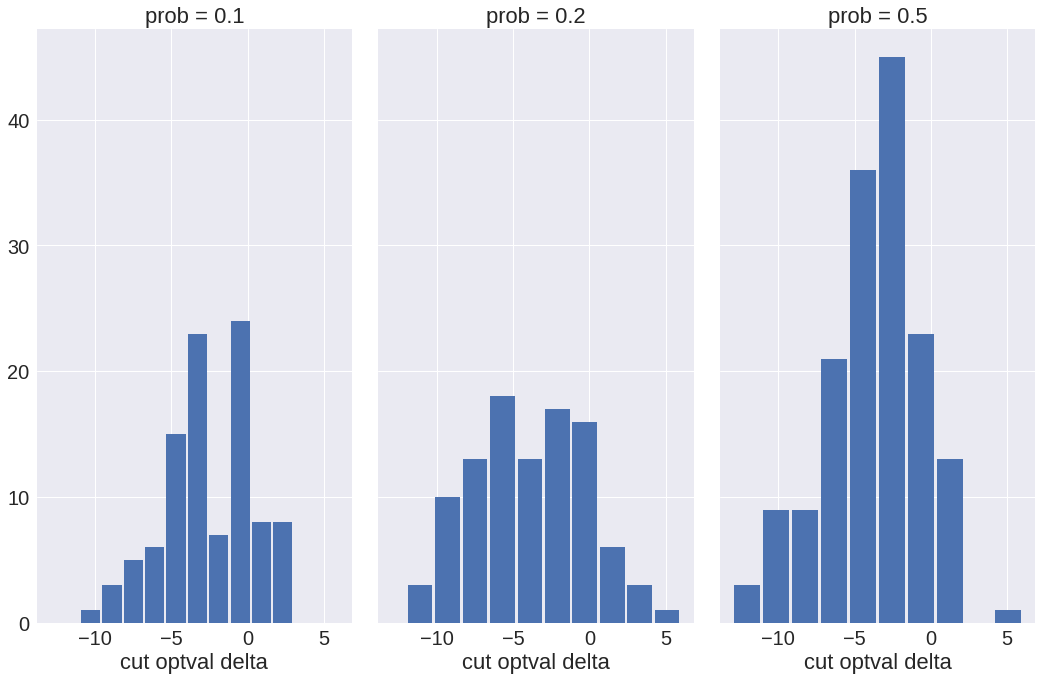

In [14]:
sns.set(font_scale=2) 
g = sns.FacetGrid(results, col='prob', size=10, aspect=0.5)
sns_plot = g.map(plt.hist, "cut optval delta", bins=10, rwidth=0.9)
sns.plt.show()
sns_plot.savefig("cut_diff_langevin.png")

### $\xi=10$

In [21]:
results = read_and_prepare_data('./results/langevin_05_50_100iter_bestvals_ksi10_eta01', 0.5)

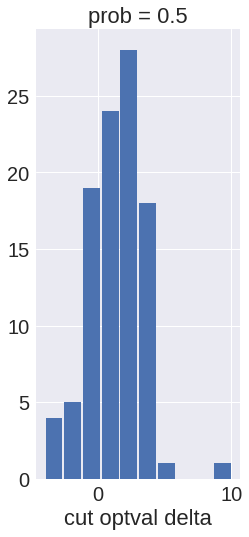

In [22]:
sns.set(font_scale=2) 
g = sns.FacetGrid(results, col='prob', size=8, aspect=0.5)
sns_plot = g.map(plt.hist, "cut optval delta", bins=10, rwidth=0.9)
sns.plt.show()
sns_plot.savefig("cut_diff_langevin.png")

In [20]:
results[results["cut optval delta"] > 2]

,langevin_cut_optval,langevin_optval,langevin_rank,sdp_cut_optval,sdp_optval,sdp_rank,cut optval delta,prob
5,375,372.00,19,372,384.64,4,3,0.1
12,354,350.00,20,350,365.81,4,4,0.1
15,357,354.00,20,354,366.76,4,3,0.1
19,363,372.48,4,360,372.48,4,3,0.1
20,379,376.00,18,376,390.13,4,3,0.1
22,382,372.00,21,372,387.59,4,10,0.1
23,366,362.00,21,362,378.53,5,4,0.1
26,378,374.00,20,374,388.91,4,4,0.1
32,359,356.00,20,356,372.27,4,3,0.1
42,389,386.00,17,386,400.21,3,3,0.1


# Rank analysis

In [22]:
sns.set(font_scale=1.5)

In [28]:
results_05 = pd.read_csv('./results/grad_logdet_test_2tol_50.csv')
results_001 = pd.read_csv('./results/grad_logdet_test_2tol_50_low_p.csv')
results_1tol = pd.read_csv('./results/grad_logdet_test_1tol.csv')

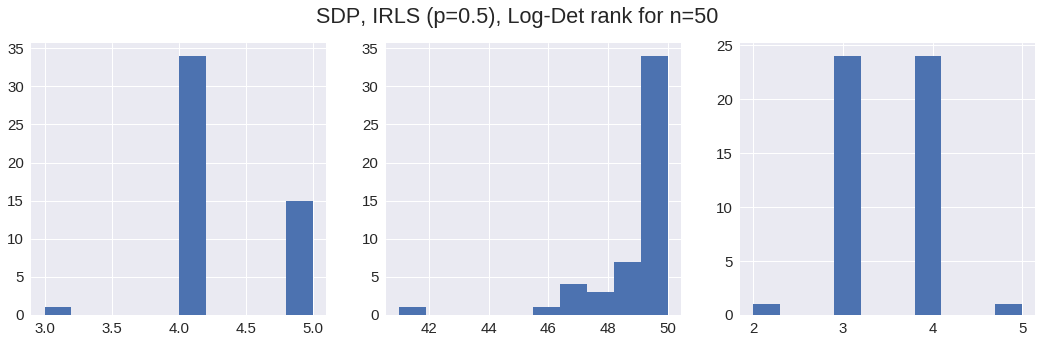

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].hist(results_05['sdp_rank'])
axes[1].hist(results_05['schatten_rank'])
axes[2].hist(results_05['logdet_rank'])

plt.suptitle('SDP, IRLS (p=0.5), Log-Det rank for n=50')
plt.show()

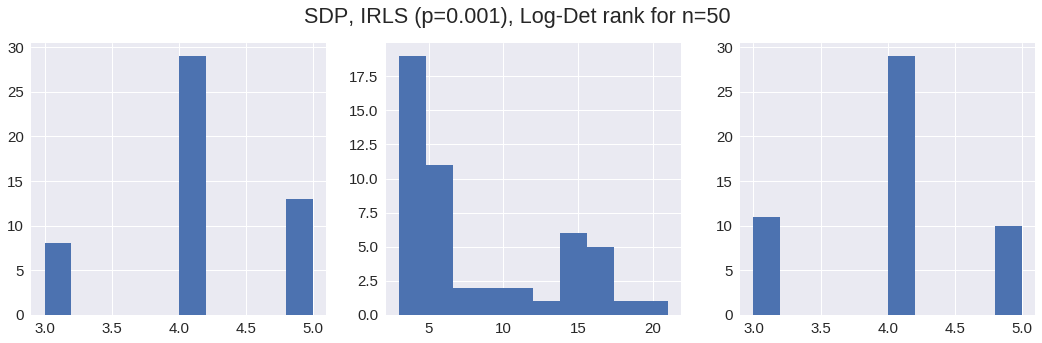

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].hist(results_001['sdp_rank'])
axes[1].hist(results_001['schatten_rank'])
axes[2].hist(results_001['logdet_rank'])

plt.suptitle('SDP, IRLS (p=0.001), Log-Det rank for n=50')
plt.show()

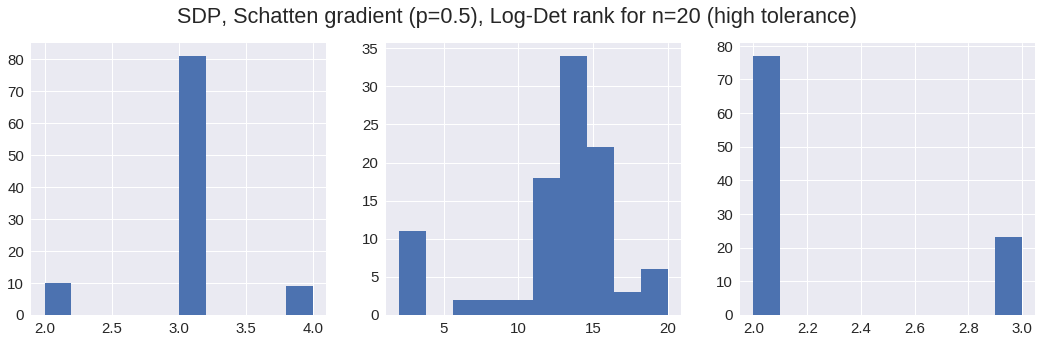

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].hist(results_1tol['sdp_rank'])
axes[1].hist(results_1tol['grad_rank'])
axes[2].hist(results_1tol['logdet_rank'])

plt.suptitle('SDP, Schatten gradient (p=0.5), Log-Det rank for n=20 (high tolerance)')
plt.show()

In [37]:
results_1tol = pd.read_csv('./results/irls_logdet_test_1tol_50_low_p.csv')
results_2tol = pd.read_csv('./results/irls_logdet_test_2tol_50_low_p.csv')

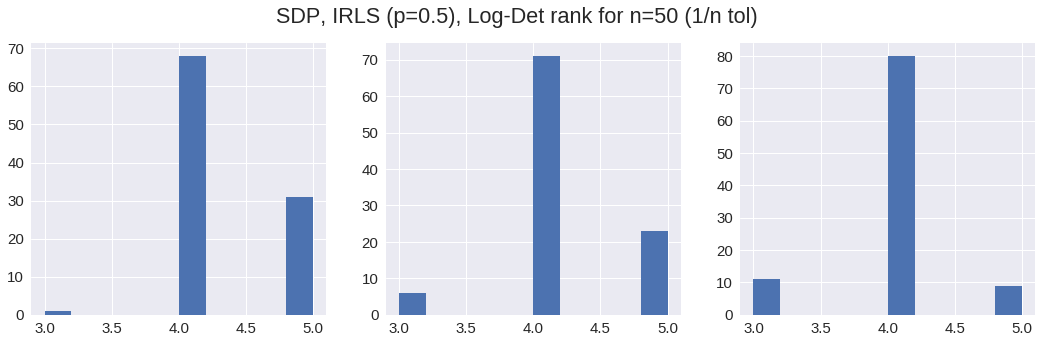

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].hist(results_1tol['sdp_rank'])
axes[1].hist(results_1tol['schatten_rank'])
axes[2].hist(results_1tol['logdet_rank'])

plt.suptitle('SDP, IRLS (p=0.5), Log-Det rank for n=50 (1/n tol)')
plt.show()

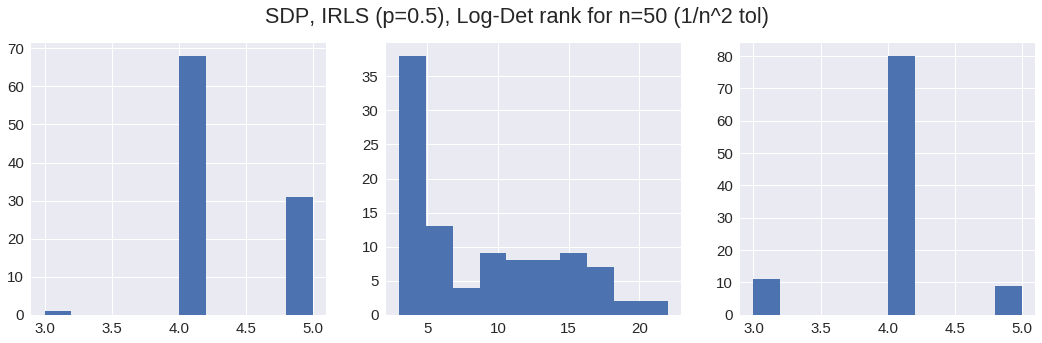

In [39]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].hist(results_2tol['sdp_rank'])
axes[1].hist(results_2tol['schatten_rank'])
axes[2].hist(results_2tol['logdet_rank'])

plt.suptitle('SDP, IRLS (p=0.5), Log-Det rank for n=50 (1/n^2 tol)')
plt.show()

# Cut value distribution

In [47]:
cut_distr_res = pd.read_csv('./results/cut_res_logdet_irls_s100_p50.csv')
means = np.mean(cut_distr_res)
print('Mean:')
print(means)
print('STD:')
print(np.std(cut_distr_res))

Mean:
SDP       1386.0968
LogDet    1386.4664
IRLS      1386.0781
dtype: float64
STD:
SDP       12.420686
LogDet    12.147480
IRLS      12.361262
dtype: float64


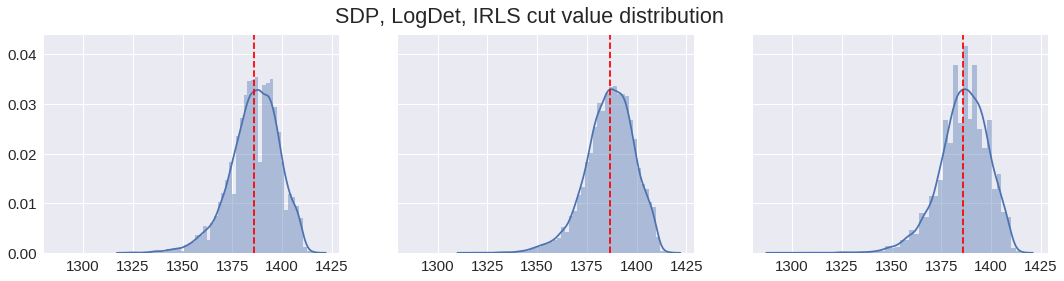

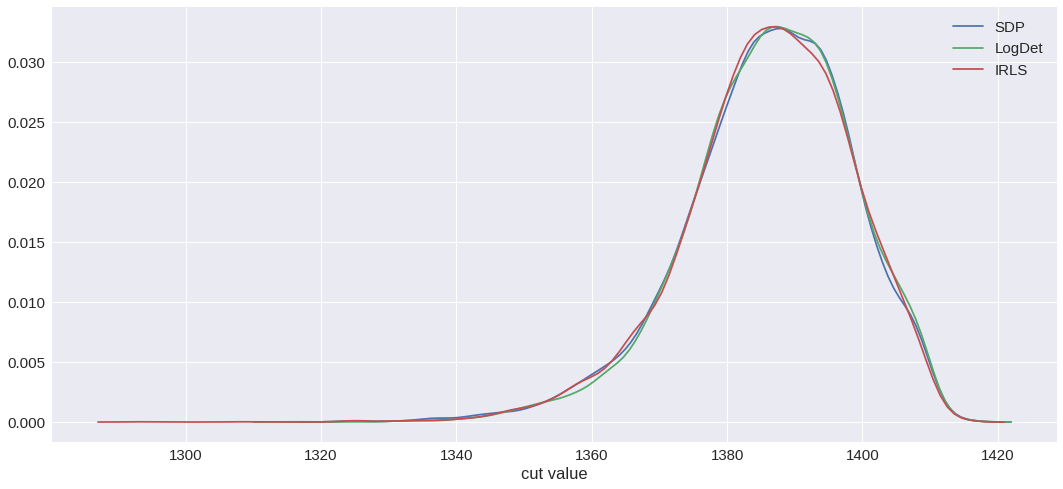

In [48]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=3, figsize=(18, 4), sharex=True, sharey=True)

sns.distplot(cut_distr_res['SDP'].values, ax=axes[0])
sns.distplot(cut_distr_res['LogDet'].values, ax=axes[1])
sns.distplot(cut_distr_res['IRLS'].values, ax=axes[2])

axes[0].axvline(x=means[0], color='r', linestyle='--')
axes[1].axvline(x=means[1], color='r', linestyle='--')
axes[2].axvline(x=means[2], color='r', linestyle='--')

plt.suptitle('SDP, LogDet, IRLS cut value distribution')
plt.show()

fig, axes = plt.subplots(figsize=(18, 8))
sns.distplot(cut_distr_res['SDP'].values, ax=axes, hist=False, label='SDP')
sns.distplot(cut_distr_res['LogDet'].values, ax=axes, hist=False, label='LogDet')
sns.distplot(cut_distr_res['IRLS'].values, ax=axes, hist=False, label='IRLS')
plt.xlabel('cut value')

plt.legend()
plt.show()

In [20]:
np.log(100) / 100

0.046051701859880917

In [49]:
def get_step(eps, p):
    return eps ** ((2 - p) / p) / (2 * p)

In [54]:
get_step(0.01, 0.9)

0.0019965631465581253

In [62]:
x = np.linspace(0.01, 0.4, 20)

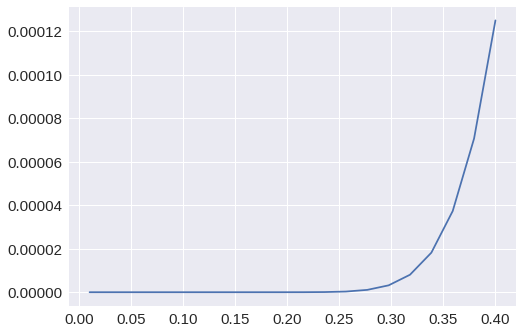

In [63]:
plt.plot(x, get_step(0.1, x))
plt.show()